In [1]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
import pandas as pd
import numpy as np

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip'
data = pd.read_csv(url, sep=';', low_memory=False, na_values=['?'], parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True)

print(data.head())

             datetime  Global_active_power  Global_reactive_power  Voltage  \
0 2006-12-16 17:24:00                4.216                  0.418   234.84   
1 2006-12-16 17:25:00                5.360                  0.436   233.63   
2 2006-12-16 17:26:00                5.374                  0.498   233.29   
3 2006-12-16 17:27:00                5.388                  0.502   233.74   
4 2006-12-16 17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  


In [3]:
data.fillna(data.mean(), inplace=True)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']] = scaler.fit_transform(
    data[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']]
)

print(data.head())


             datetime  Global_active_power  Global_reactive_power   Voltage  \
0 2006-12-16 17:24:00             0.374796               0.300719  0.376090   
1 2006-12-16 17:25:00             0.478363               0.313669  0.336995   
2 2006-12-16 17:26:00             0.479631               0.358273  0.326010   
3 2006-12-16 17:27:00             0.480898               0.361151  0.340549   
4 2006-12-16 17:28:00             0.325005               0.379856  0.403231   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0          0.377593             0.0             1.0            17.0  
1          0.473029             0.0             1.0            16.0  
2          0.473029             0.0             2.0            17.0  
3          0.473029             0.0             1.0            17.0  
4          0.323651             0.0             1.0            17.0  


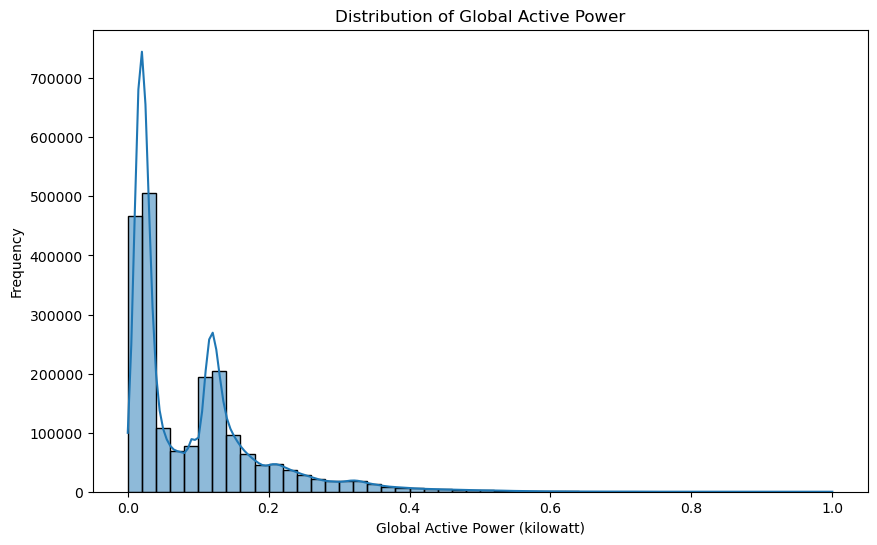

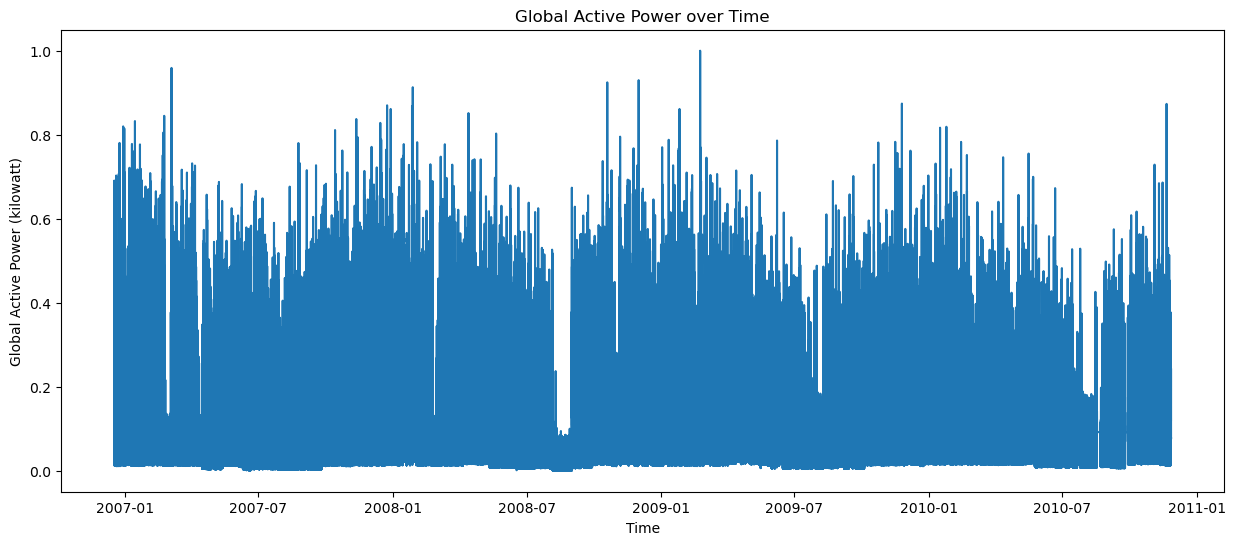

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['Global_active_power'], bins=50, kde=True)
plt.title('Distribution of Global Active Power')
plt.xlabel('Global Active Power (kilowatt)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(data['datetime'], data['Global_active_power'])
plt.title('Global Active Power over Time')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kilowatt)')
plt.show()


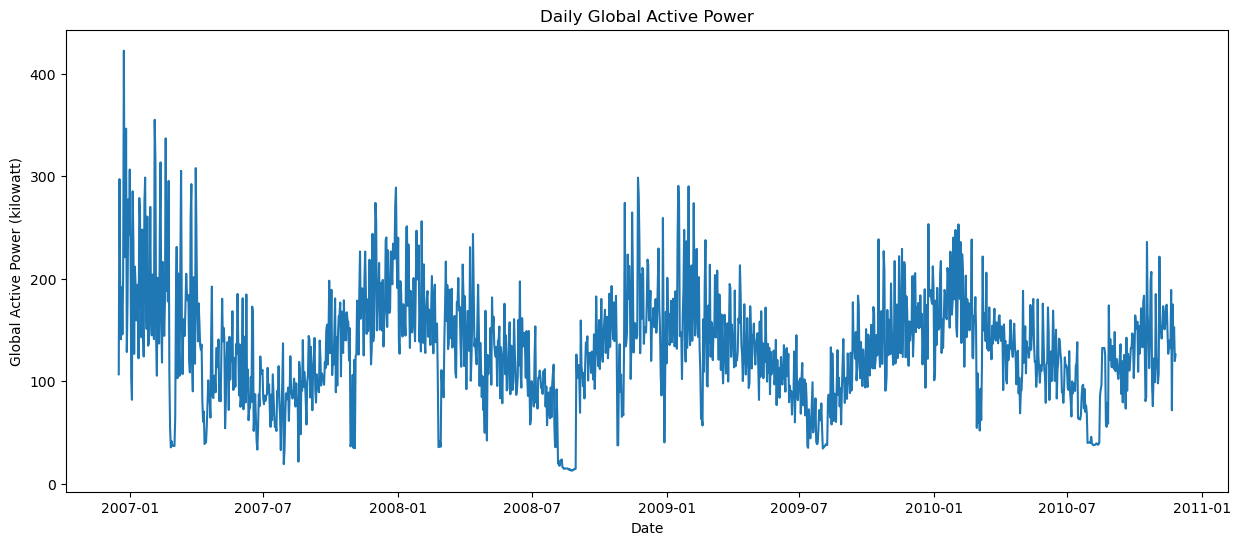

In [5]:
daily_data = data.resample('D', on='datetime').sum()

plt.figure(figsize=(15, 6))
plt.plot(daily_data.index, daily_data['Global_active_power'])
plt.title('Daily Global Active Power')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatt)')
plt.show()


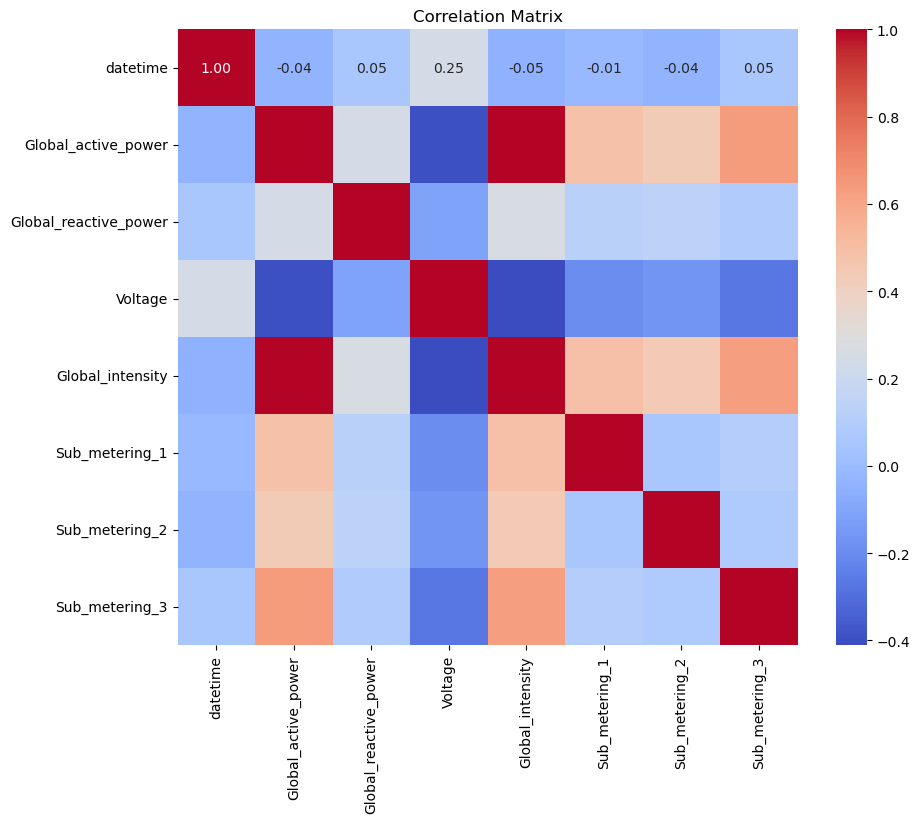

In [6]:
corr_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = data[['Global_reactive_power', 'Voltage', 'Global_intensity']]
y = data['Global_active_power']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-squared:", r2_score(y_test, y_pred))


Mean Absolute Error (MAE): 0.002568376943674385
Root Mean Squared Error (RMSE): 0.0039201401568597985
R-squared: 0.9983021747166144


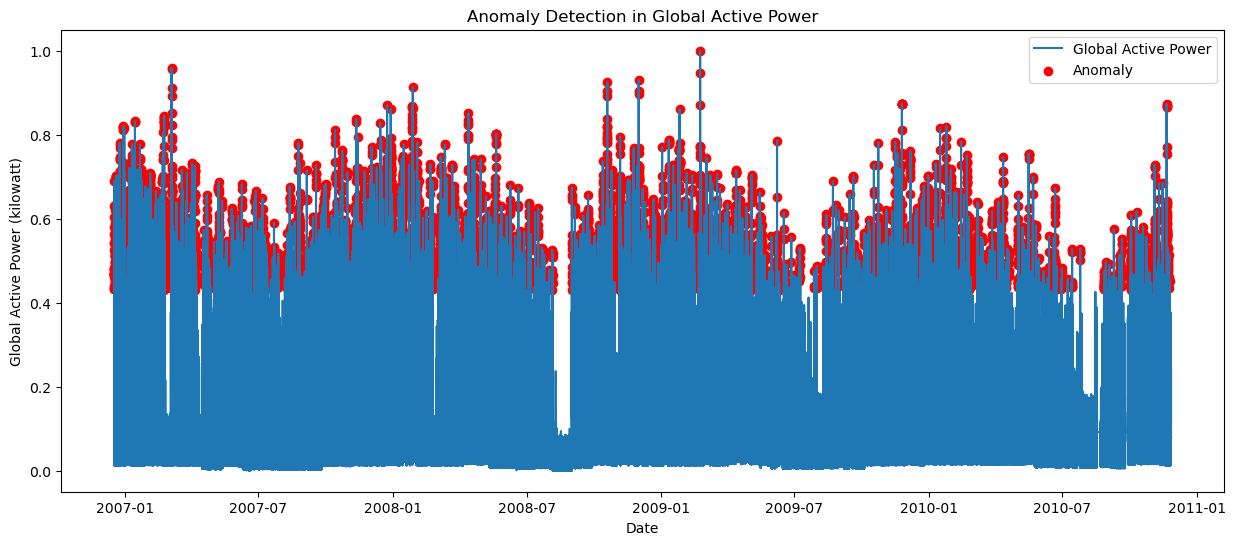

In [8]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.01)
data['anomaly'] = iso_forest.fit_predict(data[['Global_active_power']])

plt.figure(figsize=(15, 6))
plt.plot(data['datetime'], data['Global_active_power'], label='Global Active Power')
anomalies = data[data['anomaly'] == -1]
plt.scatter(anomalies['datetime'], anomalies['Global_active_power'], color='red', label='Anomaly')
plt.title('Anomaly Detection in Global Active Power')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatt)')
plt.legend()
plt.show()


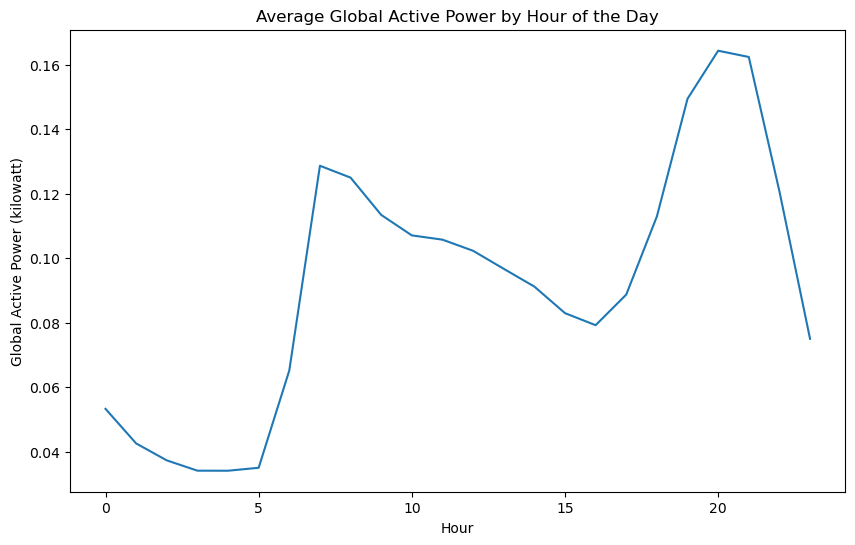

In [9]:
data['hour'] = data['datetime'].dt.hour
hourly_data = data.groupby('hour').mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_data.index, y=hourly_data['Global_active_power'])
plt.title('Average Global Active Power by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Global Active Power (kilowatt)')
plt.show()


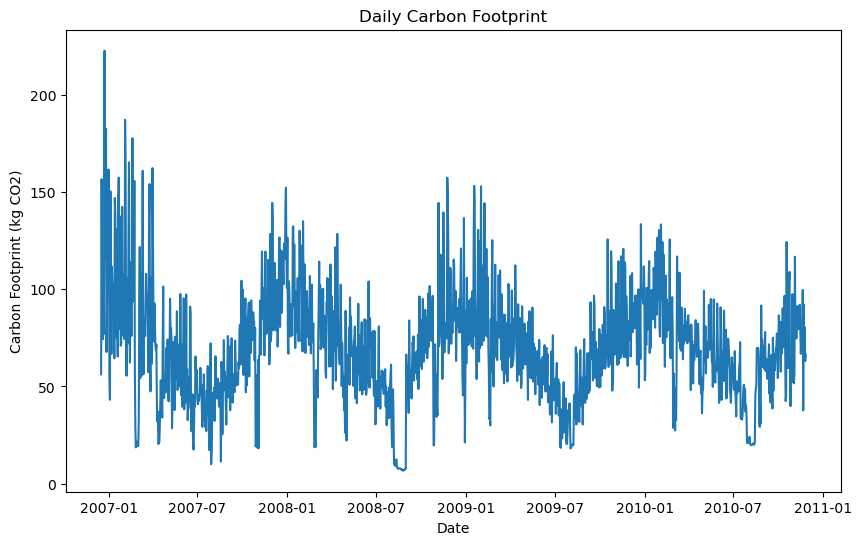

In [10]:
carbon_footprint = daily_data['Global_active_power'] * 0.527 

plt.figure(figsize=(10, 6))
plt.plot(daily_data.index, carbon_footprint)
plt.title('Daily Carbon Footprint')
plt.xlabel('Date')
plt.ylabel('Carbon Footprint (kg CO2)')
plt.show()
